In [92]:
import pandas as pd
import numpy as np

In [93]:
file_path = './data/welddb.data'

columns =  [
    "Carbon concentration / (weight%)",
    "Silicon concentration / (weight%)",
    "Manganese concentration / (weight%)",
    "Sulphur concentration / (weight%)",
    "Phosphorus concentration / (weight%)",
    "Nickel concentration / (weight%)",
    "Chromium concentration / (weight%)",
    "Molybdenum concentration / (weight%)",
    "Vanadium concentration / (weight%)",
    "Copper concentration / (weight%)",
    "Cobalt concentration / (weight%)",
    "Tungsten concentration / (weight%)",
    "Oxygen concentration / parts per million by weight",
    "Titanium concentration / parts per million by weight",
    "Nitrogen concentration / parts per million by weight",
    "Aluminium concentration / parts per million by weight",
    "Boron concentration / parts per million by weight",
    "Niobium concentration / parts per million by weight",
    "Tin concentration / parts per million by weight",
    "Arsenic concentration / parts per million by weight",
    "Antimony concentration / parts per million by weight",
    "Current / A",
    "Voltage / V",
    "AC or DC",
    "Electrode positive or negative",
    "Heat input / kJmm-1",
    "Interpass temperature / °C",
    "Type of weld",
    "Post weld heat treatment temperature / °C",
    "Post weld heat treatment time / hours",
    "Yield strength / MPa",
    "Ultimate tensile strength / MPa",
    "Elongation / %",
    "Reduction of Area / %",
    "Charpy temperature / °C",
    "Charpy impact toughness / J",
    "Hardness / kgmm-2",
    "50 % FATT",
    "Primary ferrite in microstructure / %",
    "Ferrite with second phase / %",
    "Acicular ferrite / %",
    "Martensite / %",
    "Ferrite with carbide aggreagate / %",
    "Weld ID"
]
df = pd.read_csv(file_path, header=None,delim_whitespace=True, names = columns )


C:\Users\mateu\AppData\Local\Temp\ipykernel_25192\327438712.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, header=None,delim_whitespace=True, names = columns )


In [94]:
#Fix NaNs to display
df.replace("N", np.nan, inplace=True)

print(df.isnull().sum())

Carbon concentration / (weight%)                            0
Silicon concentration / (weight%)                           0
Manganese concentration / (weight%)                         0
Sulphur concentration / (weight%)                           4
Phosphorus concentration / (weight%)                       10
Nickel concentration / (weight%)                          955
Chromium concentration / (weight%)                        868
Molybdenum concentration / (weight%)                      859
Vanadium concentration / (weight%)                        724
Copper concentration / (weight%)                         1074
Cobalt concentration / (weight%)                         1523
Tungsten concentration / (weight%)                       1577
Oxygen concentration / parts per million by weight        396
Titanium concentration / parts per million by weight      717
Nitrogen concentration / parts per million by weight      410
Aluminium concentration / parts per million by weight     747
Boron co

In [95]:
#Its reads everything was 'object'ArithmeticError
columns_to_convert = [
    'Sulphur concentration / (weight%)',
    'Phosphorus concentration / (weight%)',
    'Nickel concentration / (weight%)',
    'Chromium concentration / (weight%)',
    'Molybdenum concentration / (weight%)',
    'Vanadium concentration / (weight%)',
    'Copper concentration / (weight%)',
    'Cobalt concentration / (weight%)',
    'Tungsten concentration / (weight%)',
    'Oxygen concentration / parts per million by weight',
    'Titanium concentration / parts per million by weight',
    'Nitrogen concentration / parts per million by weight',
    'Aluminium concentration / parts per million by weight',
    'Boron concentration / parts per million by weight',
    'Niobium concentration / parts per million by weight',
    'Tin concentration / parts per million by weight',
    'Arsenic concentration / parts per million by weight',
    'Antimony concentration / parts per million by weight',
    'Current / A',
    'Voltage / V',
    'Interpass temperature / °C',
    'Post weld heat treatment temperature / °C',
    'Post weld heat treatment time / hours',
    'Yield strength / MPa',
    'Ultimate tensile strength / MPa',
    'Elongation / %',
    'Reduction of Area / %',
    'Charpy temperature / °C',
    'Charpy impact toughness / J',
    'Hardness / kgmm-2',
    '50 % FATT',
    'Primary ferrite in microstructure / %',
    'Ferrite with second phase / %',
    'Acicular ferrite / %',
    'Martensite / %',
    'Ferrite with carbide aggreagate / %'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)

Carbon concentration / (weight%)                         float64
Silicon concentration / (weight%)                        float64
Manganese concentration / (weight%)                      float64
Sulphur concentration / (weight%)                        float64
Phosphorus concentration / (weight%)                     float64
Nickel concentration / (weight%)                         float64
Chromium concentration / (weight%)                       float64
Molybdenum concentration / (weight%)                     float64
Vanadium concentration / (weight%)                       float64
Copper concentration / (weight%)                         float64
Cobalt concentration / (weight%)                         float64
Tungsten concentration / (weight%)                       float64
Oxygen concentration / parts per million by weight       float64
Titanium concentration / parts per million by weight     float64
Nitrogen concentration / parts per million by weight     float64
Aluminium concentration /

In [96]:
from sklearn.preprocessing import LabelEncoder
#Now do a labelencoder with the rest
le = LabelEncoder()
df_number = df.copy()


# Identificar colunas não numéricas
non_numeric_cols = df.select_dtypes(include=['object']).columns
# Aplicar o LabelEncoder em cada coluna não numérica
for column in non_numeric_cols:
    df[column] = le.fit_transform(df[column])

In [97]:
print(df)

      Carbon concentration / (weight%)  Silicon concentration / (weight%)  \
0                                0.037                               0.30   
1                                0.037                               0.30   
2                                0.037                               0.30   
3                                0.037                               0.31   
4                                0.037                               0.31   
...                                ...                                ...   
1647                             0.100                               0.35   
1648                             0.088                               0.36   
1649                             0.090                               0.34   
1650                             0.092                               0.35   
1651                             0.180                               0.39   

      Manganese concentration / (weight%)  Sulphur concentration / (weight%

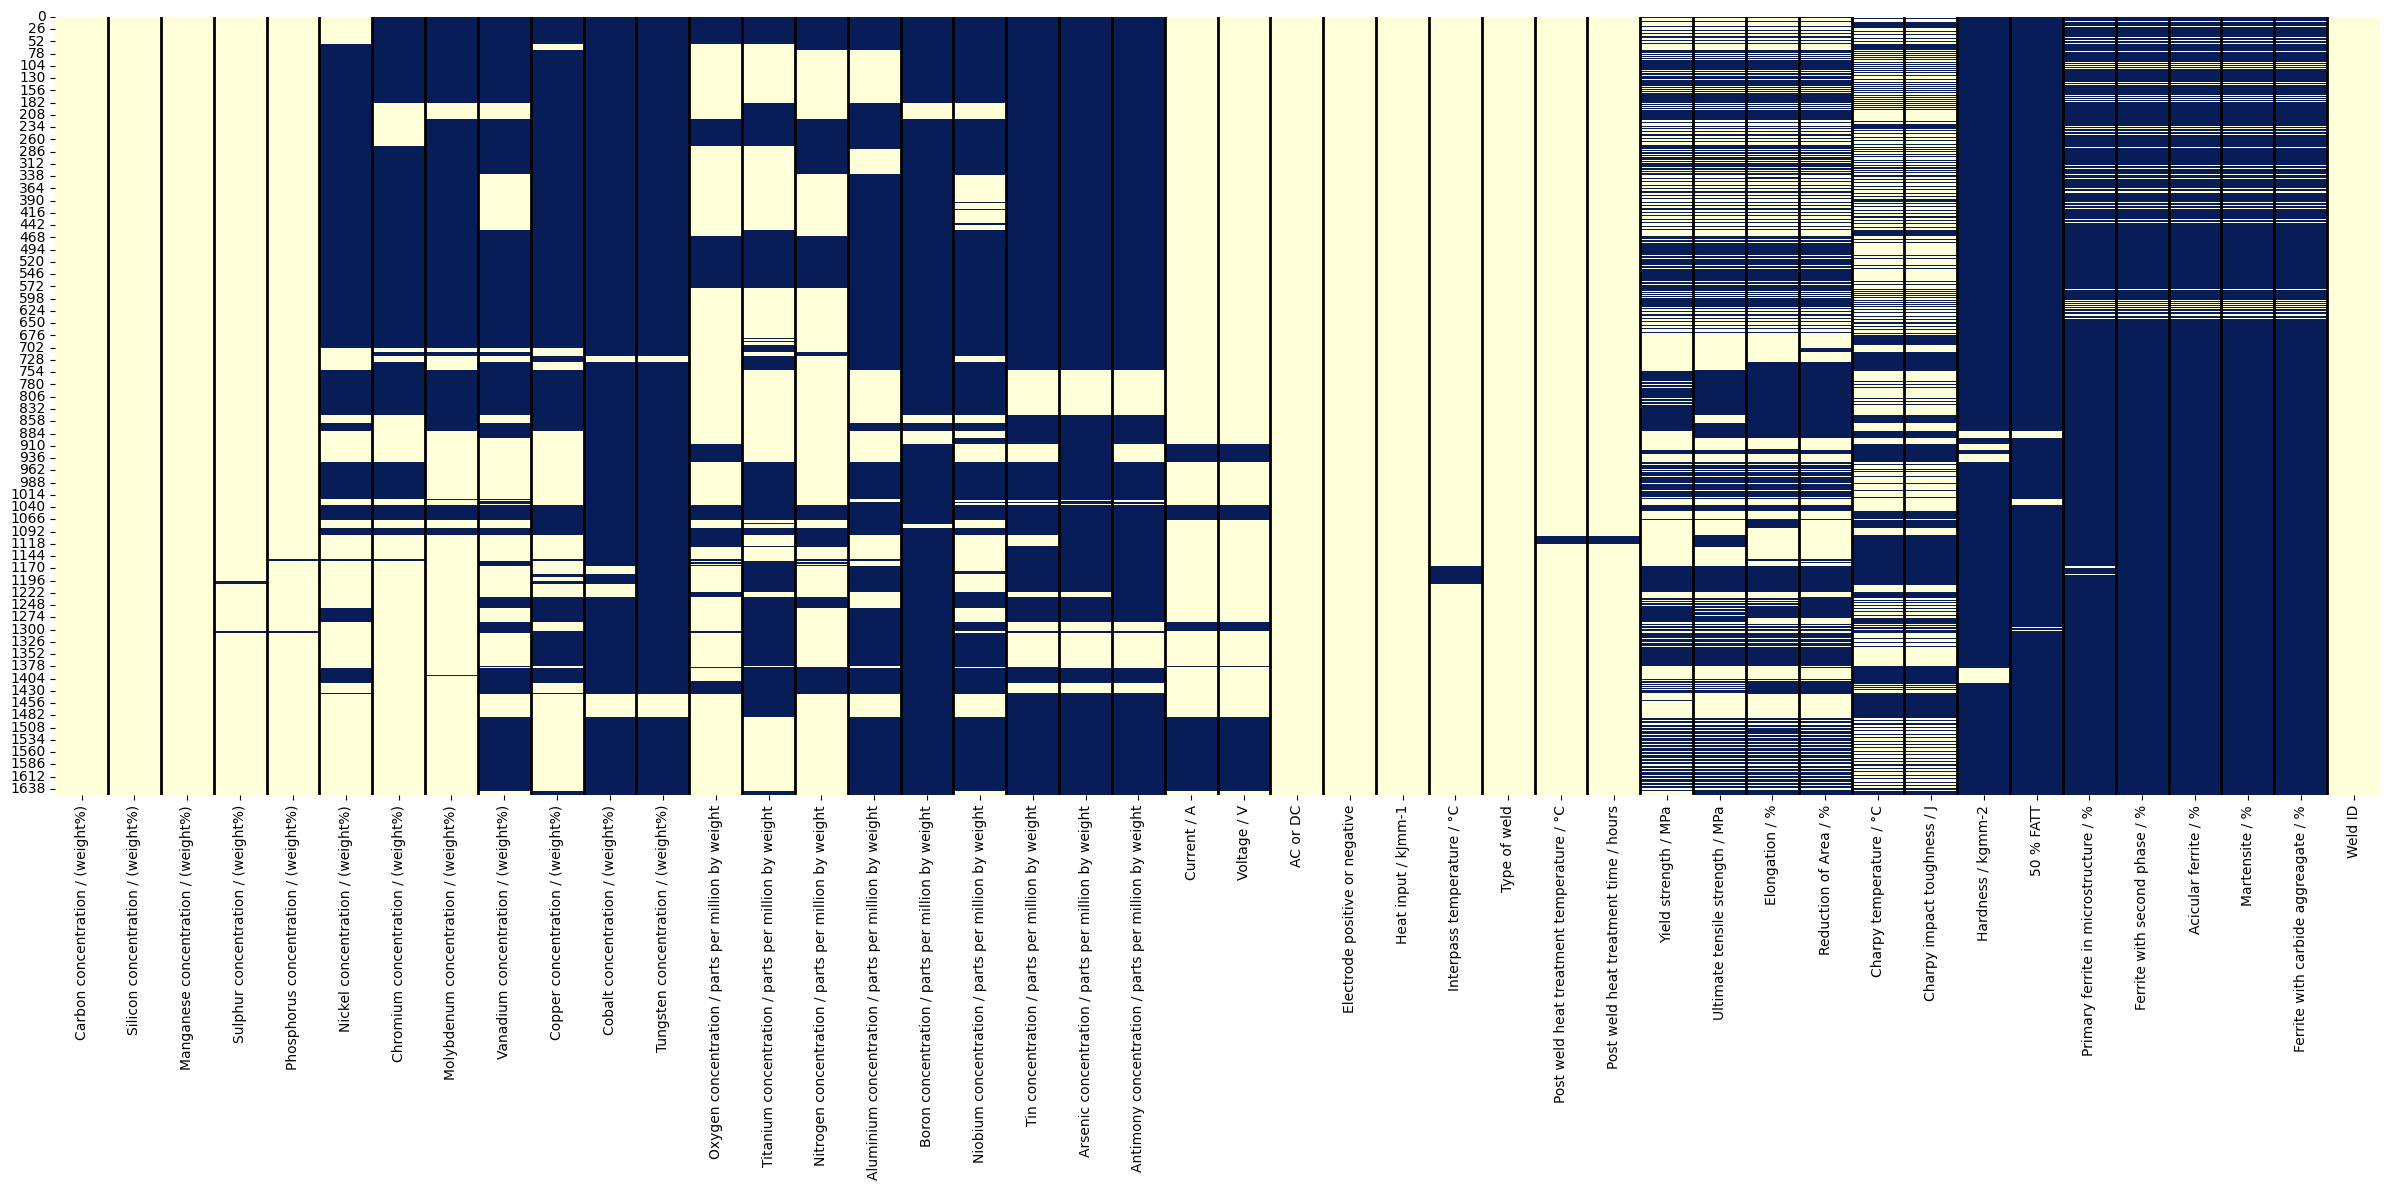

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom colormap -- YEALLOW MEANS NOT A NANS, BLUE MEANS THERE IS A NANS 
cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a figure for the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)

# Add vertical lines to separate every column
for pos in range(1, len(df.columns)): 
    plt.axvline(x=pos, color='black', linewidth=2)

# Calculate the midpoint positions for the labels
midpoint_positions = [i - 0.5 for i in range(1, len(df.columns) + 1)]

# Label the columns at the midpoint positions
plt.xticks(ticks=midpoint_positions, labels=df.columns, rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

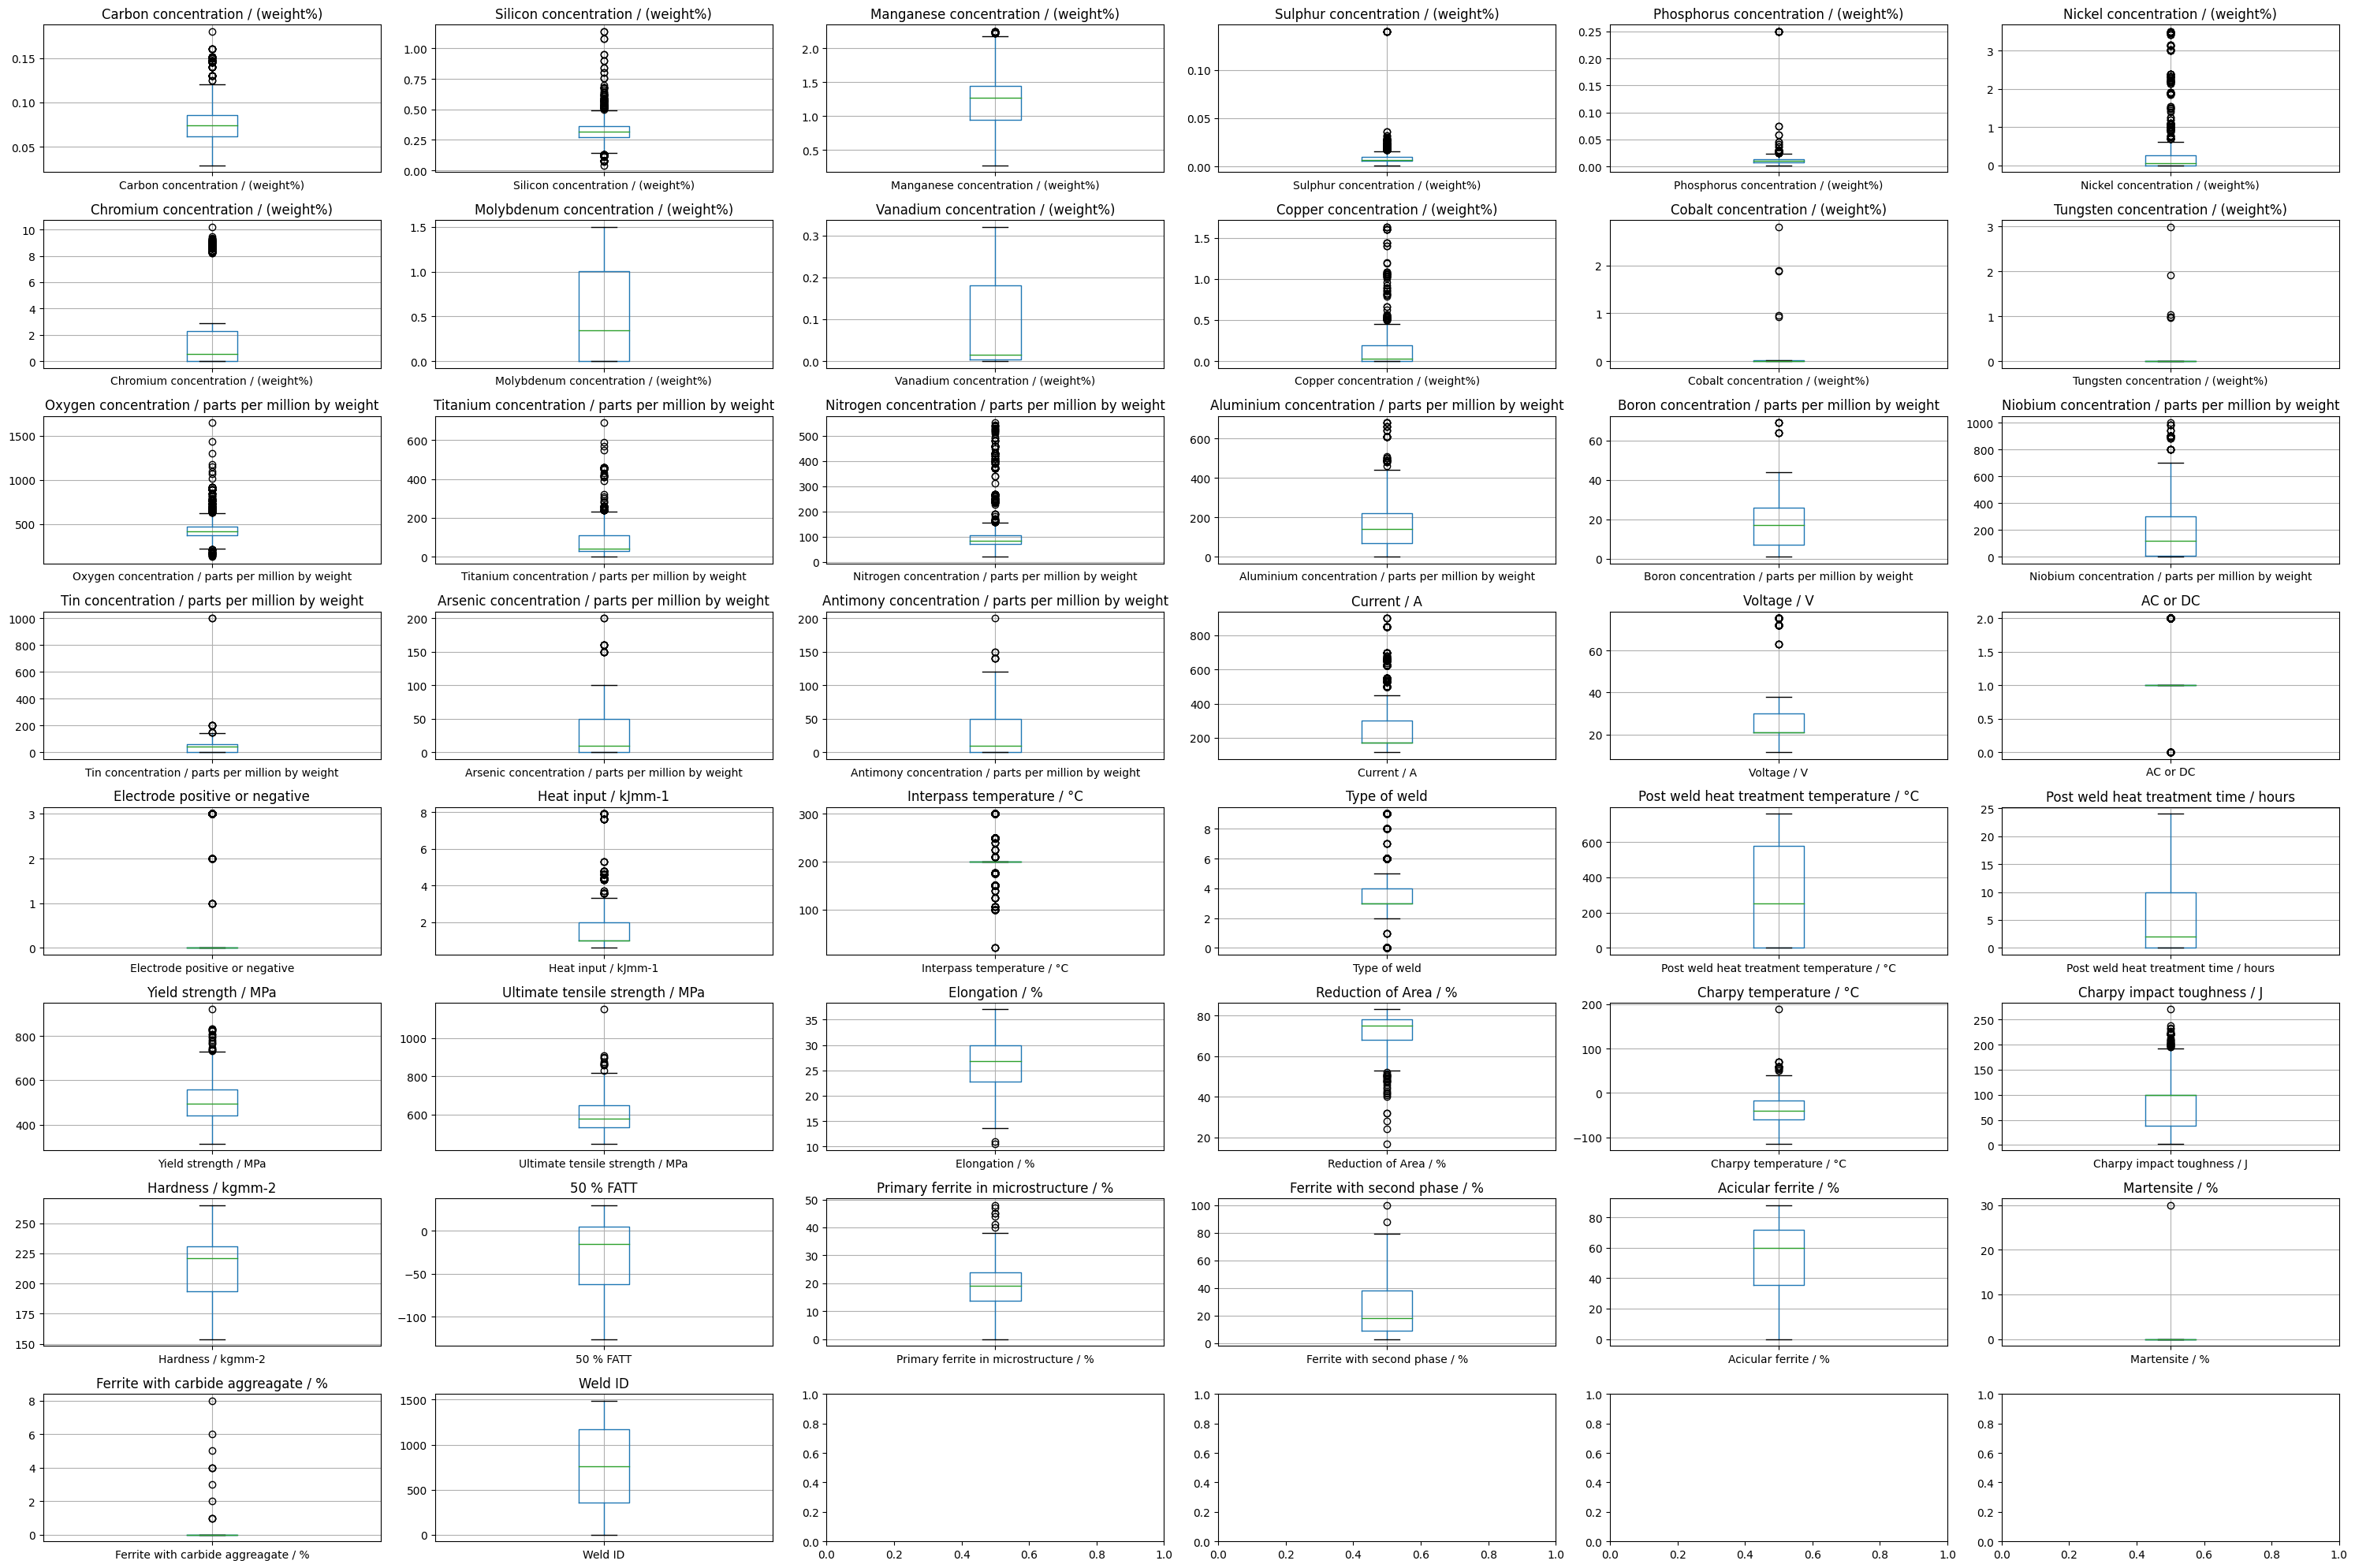

In [103]:
num_cols = len(df.columns)
cols_per_row = 6
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Adjusted to handle non-divisible cases

# Create subplots based on the number of columns and rows
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(30, 20))

# Loop through the columns of the DataFrame
for i, column in enumerate(df.columns):
    # Determine the correct position of the subplot
    row = i // cols_per_row
    col = i % cols_per_row
    
    # Create a boxplot for each column in its respective subplot
    df.boxplot(column=column, ax=axes[row, col])  # Pass the column name as a string
    
    axes[row, col].set_title(column)

# Adjust the layout
plt.tight_layout()
plt.show()

<Axes: >

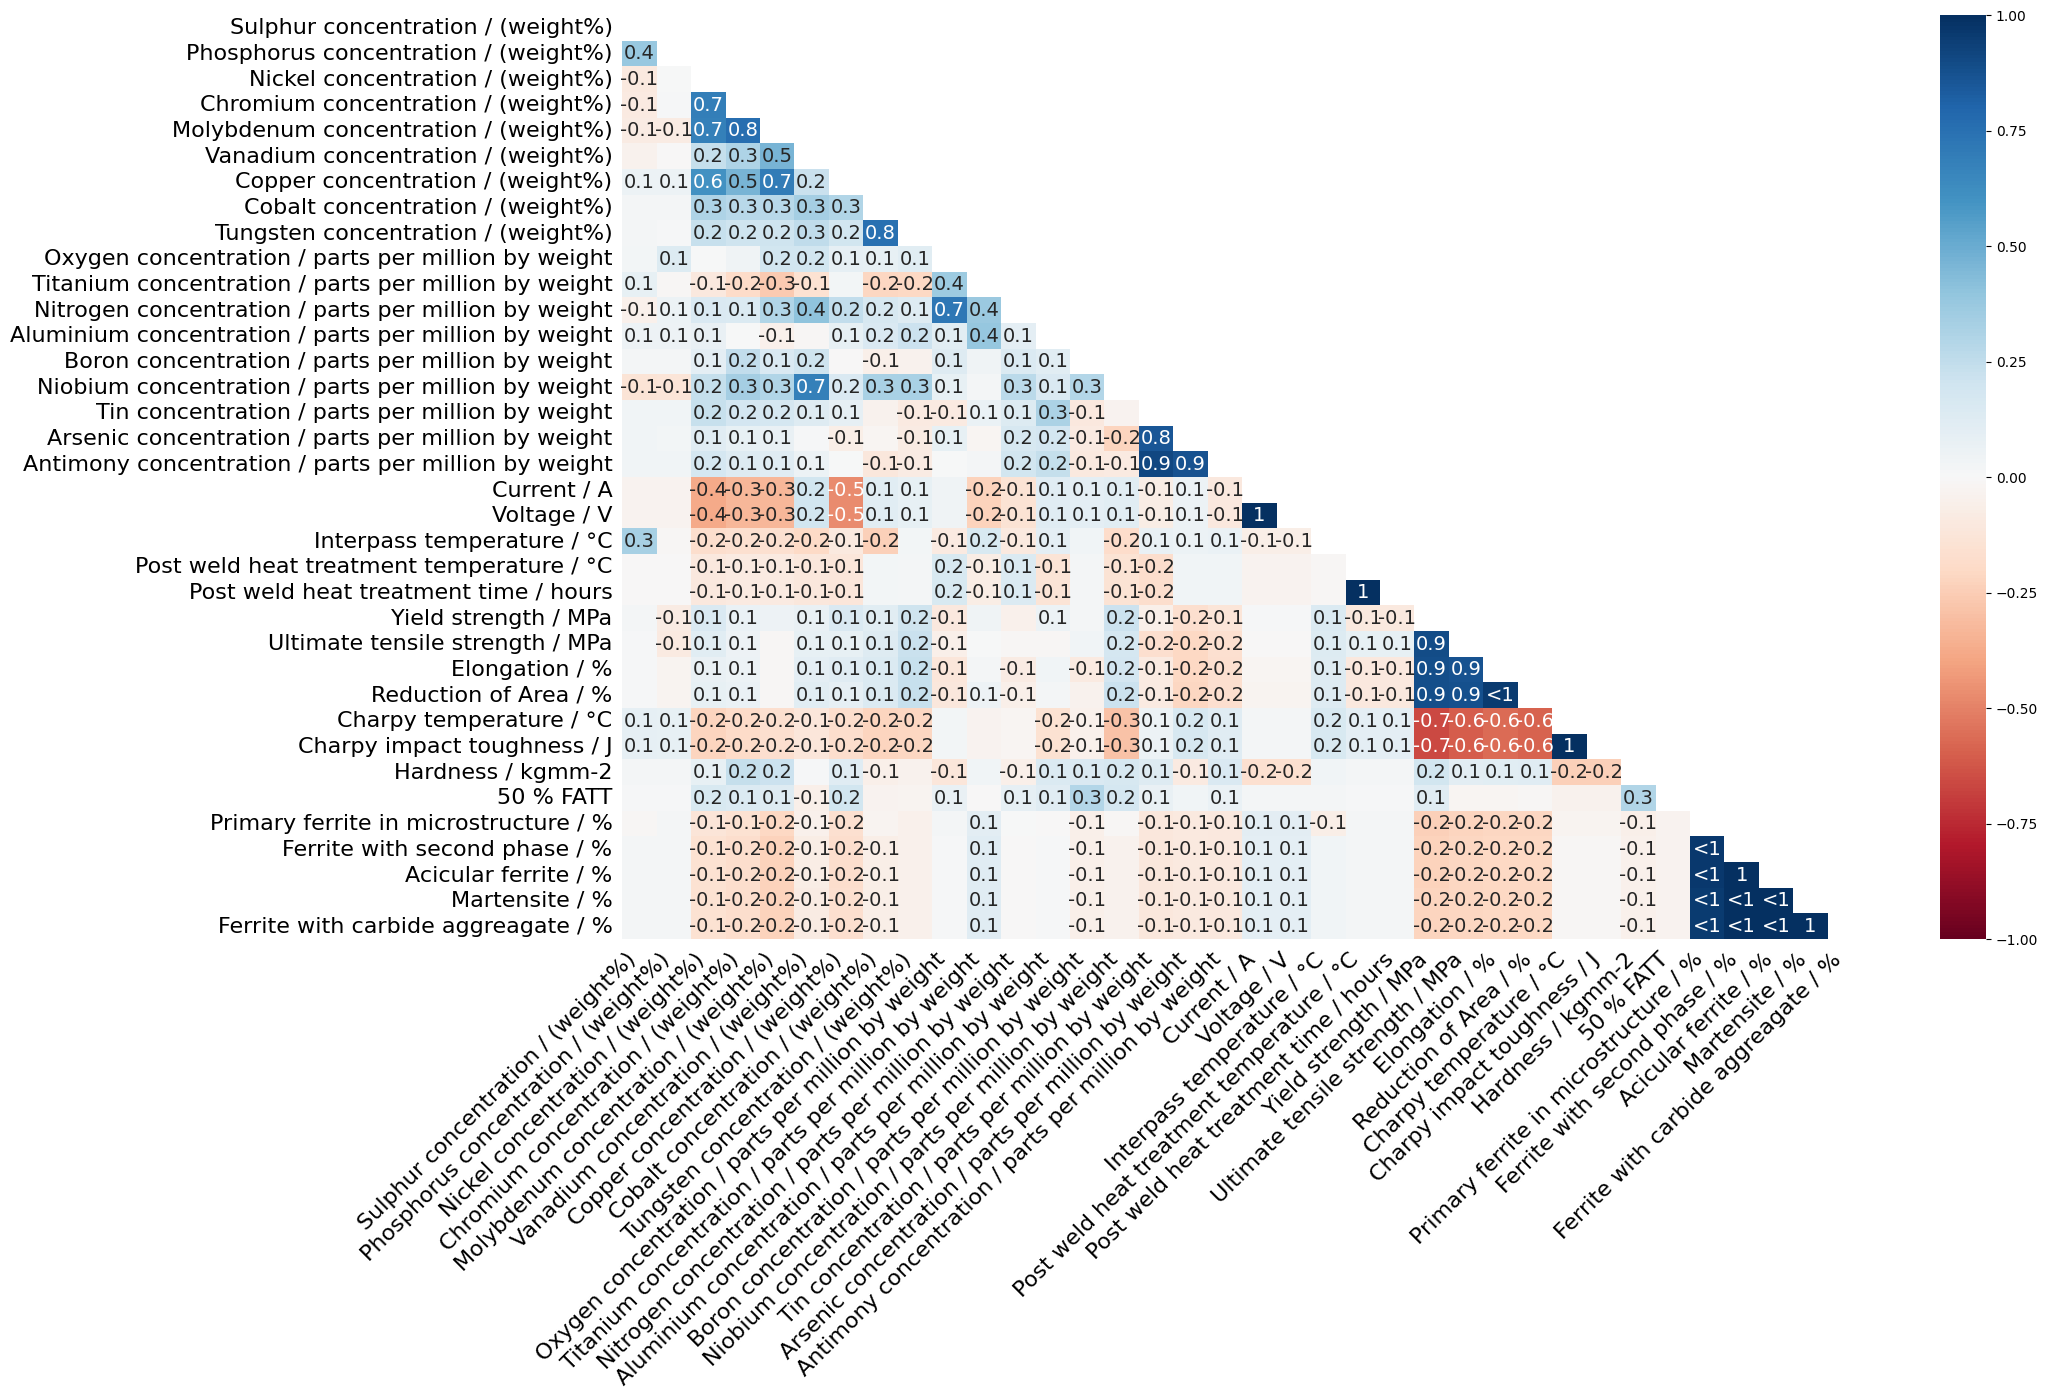

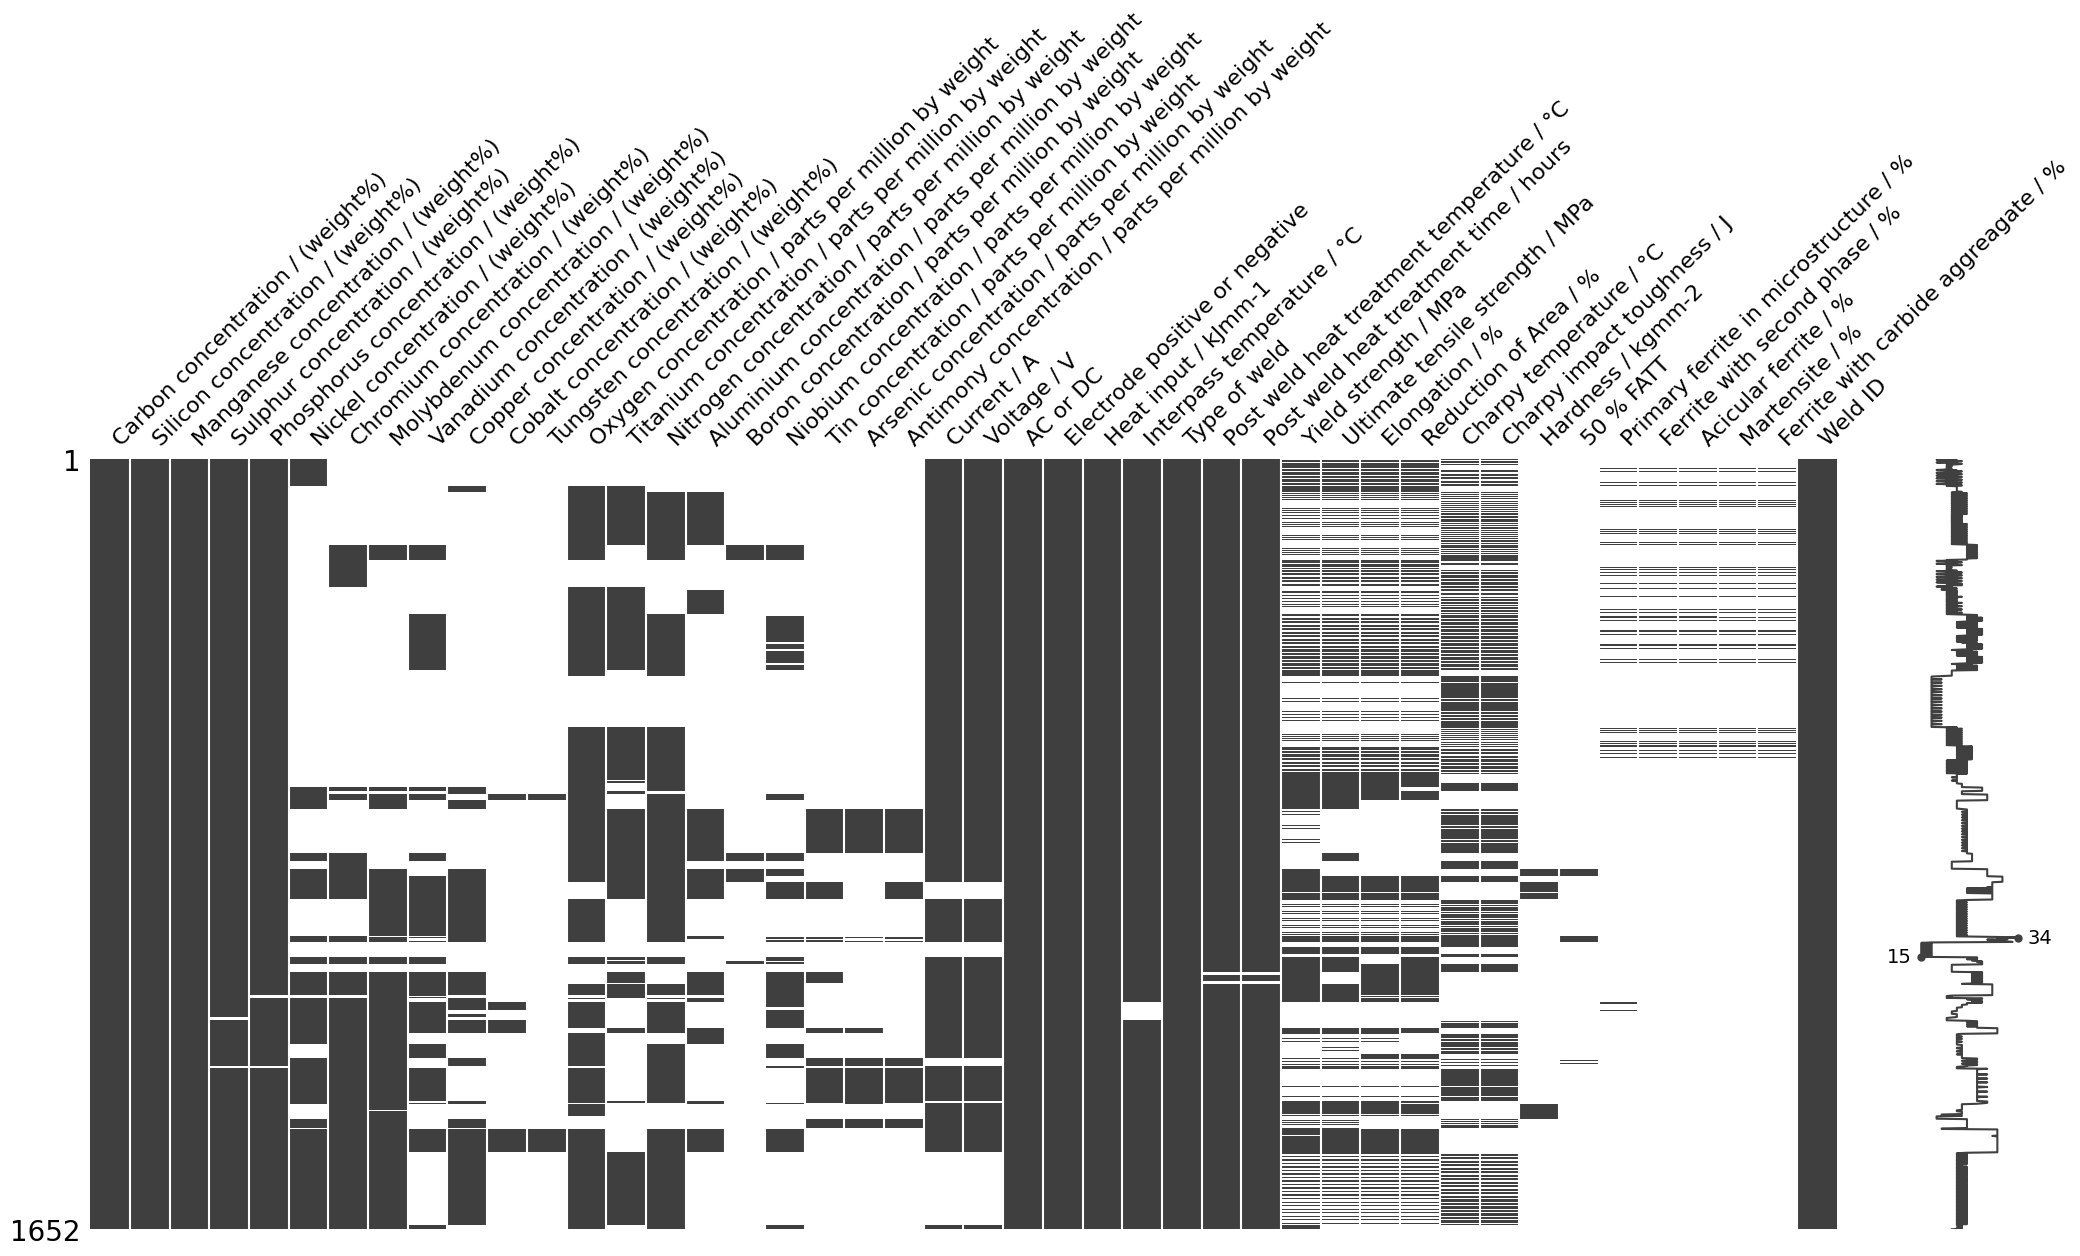

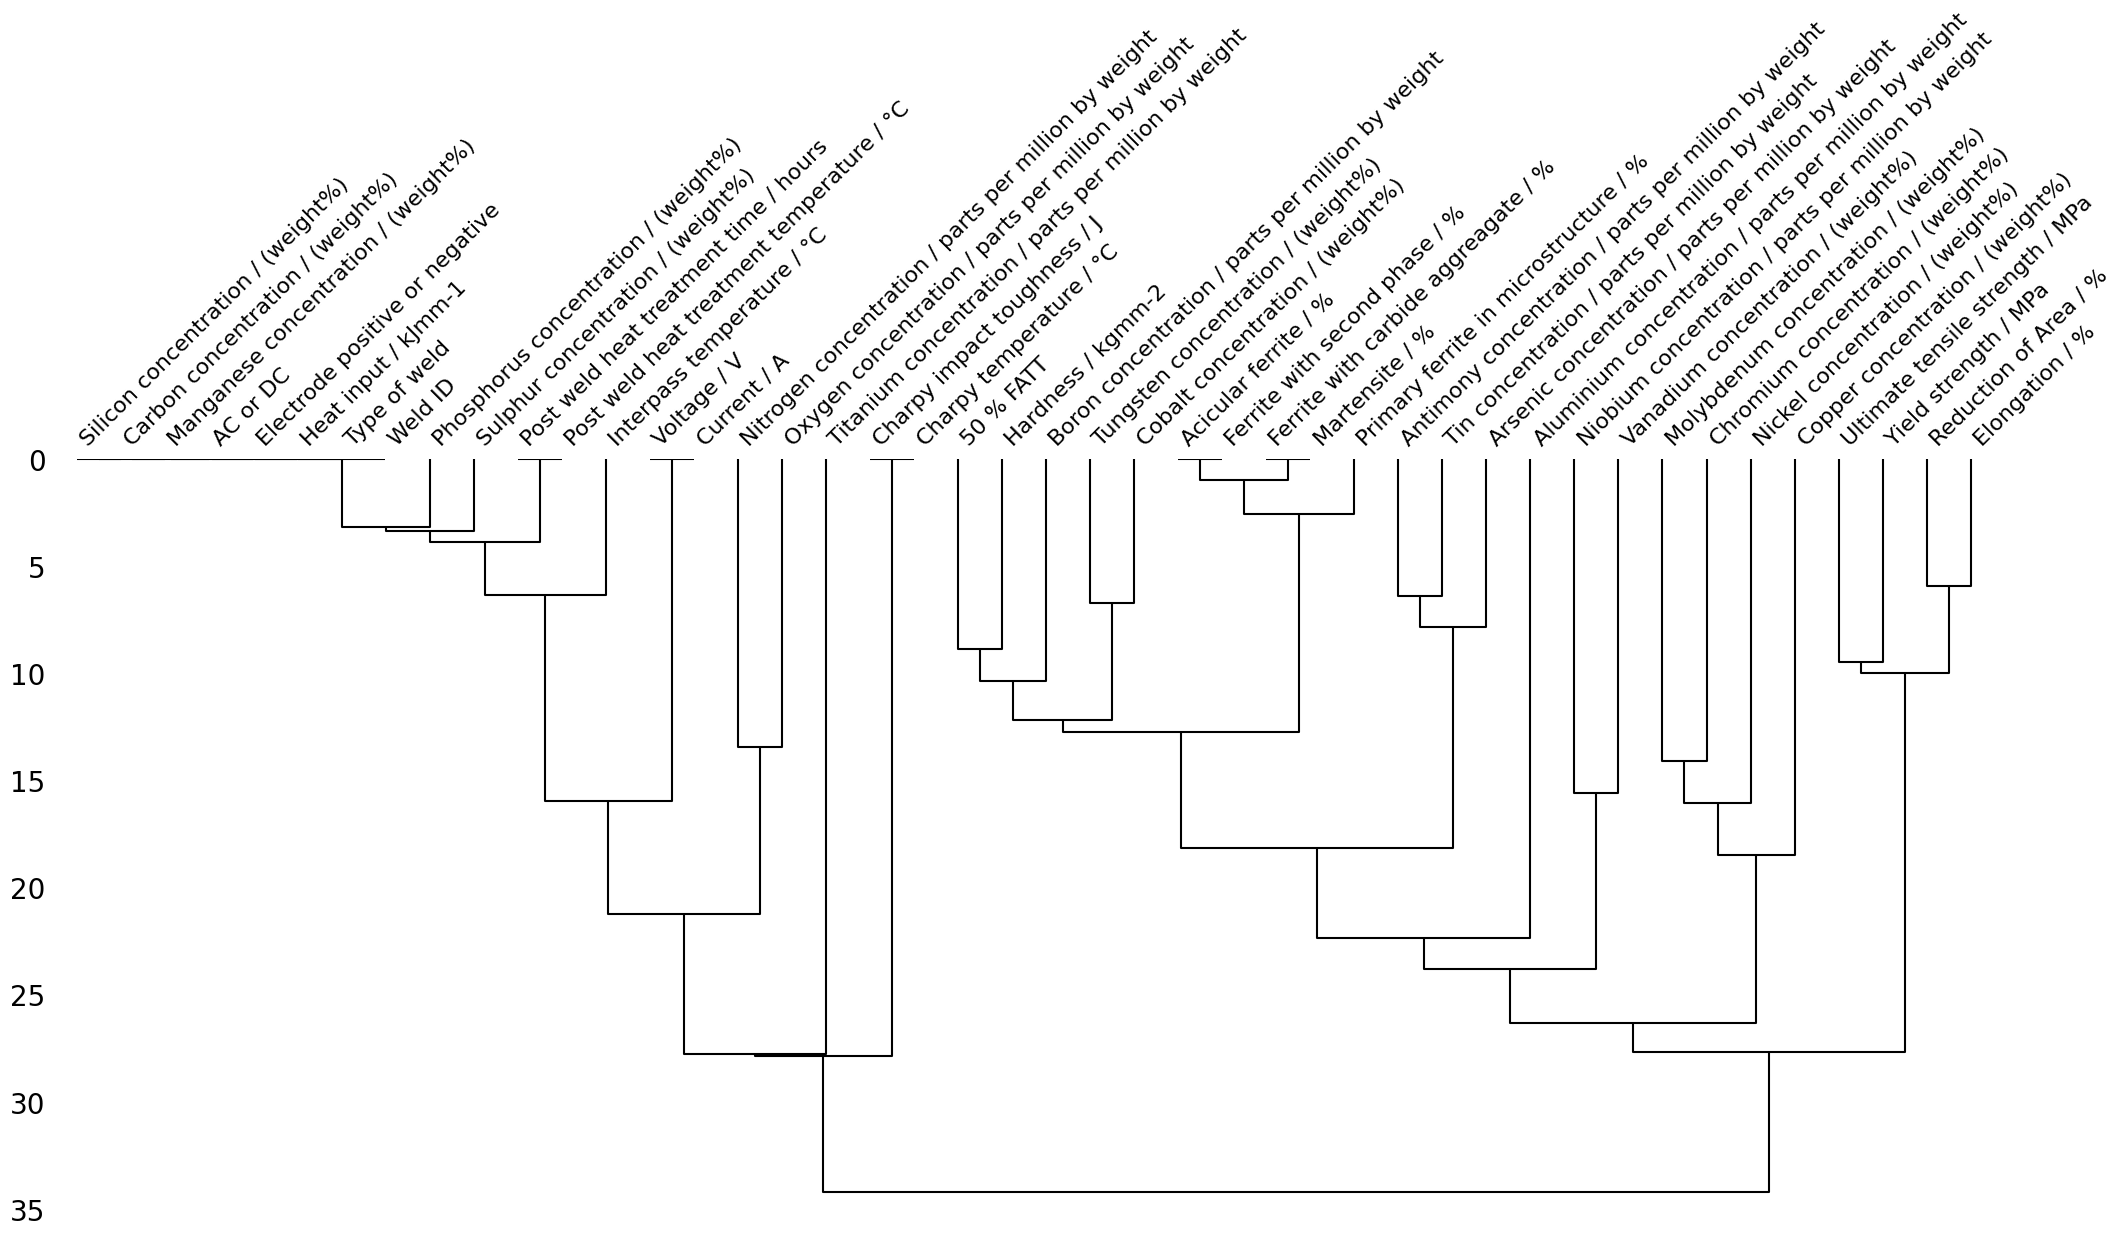

In [100]:
import missingno as msno

#Une valeur proche de -1 signifie que si une variable apparaît, il est très probable que l’autre variable soit manquante.
#Une valeur proche de 0 signifie qu’il n’y a pas de corrélation particulière sur la présence ou non de valeurs entre deux variables.
#Une valeur proche de 1 signifie que si une variable apparaît, il est très probable que l’autre variable soit présente.
msno.heatmap(df)

#Show all the missing in a form of a bar
msno.matrix(df)

# Correlation maps, the closest it is the more relation the two features have
msno.dendrogram(df)


#Conclusion: With this map our data NaNs is probably not MNAR.

In [101]:
from scipy.stats import chi2

#My function only checks numbers

def little_mcar_test(data):
    # Filter only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    print(numeric_data)

    # Convert to numpy array and handle NaNs
    data_matrix = numeric_data.to_numpy()
    n, m = data_matrix.shape
    
    # Create a mask of the missing values
    missing_mask = np.isnan(data_matrix)
    
    # Calculate observed and expected frequencies
    observed_counts = np.array(~missing_mask).sum(axis=0)
    total_counts = np.array(~missing_mask).sum()
    
    # Calculate the expected frequencies assuming MCAR
    expected_counts = (observed_counts / total_counts) * n
    
    # Calculate Chi-squared statistic
    chi2_stat = ((observed_counts - expected_counts) ** 2 / expected_counts).sum()
    
    # Degrees of freedom
    df = m - 1  # Number of columns - 1
    
    # Calculate p-value
    p_value = 1 - chi2.cdf(chi2_stat, df)
    
    return chi2_stat, p_value


# Run Little's MCAR test
chi2_stat, p_value = little_mcar_test(df_number)
    
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)



      Carbon concentration / (weight%)  Silicon concentration / (weight%)  \
0                                0.037                               0.30   
1                                0.037                               0.30   
2                                0.037                               0.30   
3                                0.037                               0.31   
4                                0.037                               0.31   
...                                ...                                ...   
1647                             0.100                               0.35   
1648                             0.088                               0.36   
1649                             0.090                               0.34   
1650                             0.092                               0.35   
1651                             0.180                               0.39   

      Manganese concentration / (weight%)  Sulphur concentration / (weight%

In [102]:
# Create a missingness indicator DataFrame
missing_indicator = df.isnull().astype(int)

# Calculate correlation between missingness indicators and the original features
correlation_matrix = missing_indicator.corrwith(df).dropna()

# Display the correlation
print(correlation_matrix)

Series([], dtype: float64)
